<h3 style = 'color: red'>1. What is the dataset about:</h3>
- The data is related to the financial markets of America, for each stock on specific dates, we have a series of information, according to which we can analyze the data.
<p></p>
<h5 style = 'color: green'>Metadata</h5>

| Vairable name | Description                                             |
|---------------|---------------------------------------------------------|
| Date          | Specifies Trading Date                                  |
| Open          | Opening Price                                           |
| High          | Maximum price during the day                            |
| Low           | Minimun price during the day                            |
| Close         | Close price adjusted for splits                         |
| Adj Close     | Final Price                                             |
| Volumne       | Then number of shares that changes hands during the day |

<h3 style = 'color: red'>2. What is this project about:</h3>
-In this project, we are going to analysis the data and identify and remove all types of errors, such as noise and missing data, and after cleaning the data, we will analysis them and reach a general conclusion.

In [1]:
# import libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

<h3 style = 'color: red'>3. Exploration Data Analyze (EDA):</h3>

In [2]:
# Add data from csv file
data = pd.read_csv('Market.csv')
data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [3]:
print('Data Info')
print(data.info())
print(f'\n Data shape: {data.shape}')
print(f'\n Summary of null values')
print(data.isnull().sum())

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110252 non-null  float64
 4   Low        110251 non-null  float64
 5   Close      110250 non-null  float64
 6   Adj Close  110244 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB
None

 Data shape: (112457, 8)

 Summary of null values
Index           0
Date            0
Open         2204
High         2205
Low          2206
Close        2207
Adj Close    2213
Volume       2204
dtype: int64


In [4]:
print(f'\n Data Statistic Summary')
print(data.describe())


 Data Statistic Summary
                Open           High            Low          Close  \
count  110253.000000  110252.000000  110251.000000  110250.000000   
mean     7658.561932    7704.538416    7608.129749    7657.740822   
std      9011.455529    9066.605458    8954.536718    9011.555549   
min        54.869999      54.869999      54.869999      54.869999   
25%      1855.060059    1864.687470    1844.015015    1855.347473   
50%      5194.399902    5226.750000    5154.299805    5194.889892   
75%     10134.299810   10207.827635   10060.369630   10134.867430   
max     68775.062500   69403.750000   68516.992190   68775.062500   

           Adj Close        Volume  
count  110244.000000  1.102530e+05  
mean     7657.982529  1.273975e+09  
std      9011.723572  4.315783e+09  
min        54.869999  0.000000e+00  
25%      1855.057556  0.000000e+00  
50%      5195.699951  4.329000e+05  
75%     10135.512452  1.734314e+08  
max     68775.062500  9.440374e+10  


<h5 style = 'color:orange'>Summary about the data</h5>
<p>- Has 112457 rows and 8 columns</p>
<p>- Missing values can be seen in columns except "Index" and "Date"</p>
<p>- "Standard Deviation" (std) is high, means data dispersion is high</p>
<p>- Posibility of data noise is very high</p>

---

In [5]:
# Separate Year and Month columns from "Date" column
datetime_column = pd.to_datetime(data['Date'])
data['year'] = datetime_column.dt.year
data['month'] = datetime_column.dt.month

In [6]:
# Map month name by month number
month_dict = {1: 'January', 
              2:'Febuary', 
              3:'March', 
              4: 'April', 
              5:'May', 
              6:'June', 
              7:'July', 
              8:'August', 
              9:'September', 
              10:'October', 
              11:'November', 
              12:'December'}
data['monthName'] = data['month'].map(month_dict)

# Filter the data for 'NYA' only
data = data[data.Index == 'NYA']

In [7]:
data.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,year,month,monthName
0,NYA,12/31/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,1965,12,December
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,1966,1,January
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,1966,1,January
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,1966,1,January
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,1966,1,January


In [8]:
data.isnull().sum()

Index         0
Date          0
Open          1
High          2
Low           3
Close         4
Adj Close    10
Volume        1
year          0
month         0
monthName     0
dtype: int64

---
<h5 style = 'color:orange'>Deal with missing value</h5>
<p>We drop missing values if they are less then 5% of the total data</p>
<p>- We set up a threshold which is 5% of total data</p>
<p>- Filter columns whether they have missing values less than threshold</p>
<p>- Drop missing values only in those columns</p>

In [9]:
# Set up threshold to drop missing value (5% of total data)
threshold = len(data)*0.05
col_to_drop = data.columns[data.isnull().sum() <= threshold]
data.dropna(subset = col_to_drop, inplace = True)

In [10]:
data.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
month        0
monthName    0
dtype: int64

<h5 style = 'color:orange'>Deal with noisy data</h5>
<p>- Graph the data to find noisy data in each column</p>

In [11]:
data.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'year', 'month', 'monthName'],
      dtype='object')

In [12]:
def data_viz(data, x, y):
    plt.clf()
    label_color = '#B80000'
    point_color = '#FF9800'
    sns.relplot(data, x = x, y=y, color = point_color)
    plt.xticks(rotation = 45)
    plt.xlabel(x ,color = label_color, fontsize = 16)
    plt.ylabel(y ,color = label_color, fontsize = 16)
    sns.set_style('whitegrid')
    plt.show()

<Figure size 640x480 with 0 Axes>

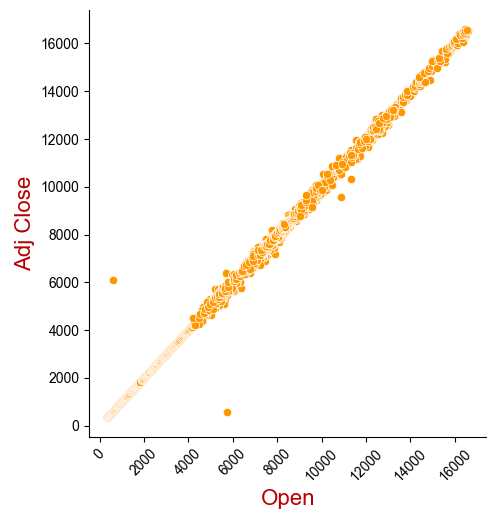

In [13]:
data_viz(data, 'Open', 'Adj Close')

In [14]:
# Remove noisy data:
# Point 1: Open is [0:2000] and Adj Close is [6000:8000]
condition1 = (data['Open'] > 0)  & (data['Open'] < 2000) & (data['Adj Close'] > 6000) & (data['Adj Close'] < 8000)
# Point 2: Open is [4000:6000] and Adj Close is [0:2000]
condition2 = (data['Open'] > 4000)  & (data['Open'] < 6000) & (data['Adj Close'] > 0) & (data['Adj Close'] < 2000)
noisyData = data[condition1 | condition2]
noisyData

,Index,Date,Open,High,Low,Close,Adj Close,Volume,year,month,monthName
831,NYA,5/29/1969,611.900024,611.900024,611.900024,611.900024,6110.900024,0.0,1969,5,May
852,NYA,6/30/1969,5722.359985,572.359985,572.359985,572.359985,572.359985,0.0,1969,6,June


In [15]:
data.drop(noisyData.index, inplace = True)

<Figure size 640x480 with 0 Axes>

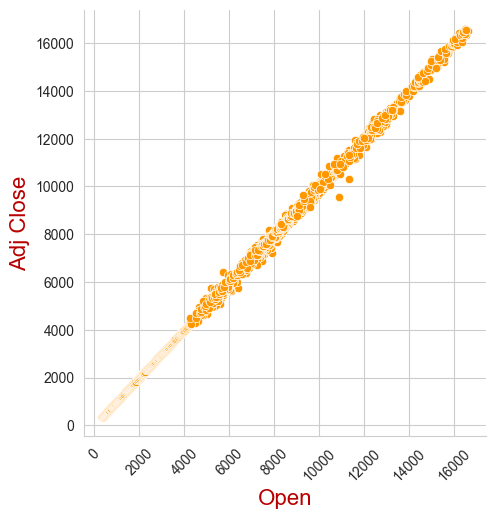

In [16]:
data_viz(data, 'Open', 'Adj Close')

<h5>We were able to remove noisy data from this scatterplot. We are going to apply same ways for all other scatterplol</h5>

<Figure size 640x480 with 0 Axes>

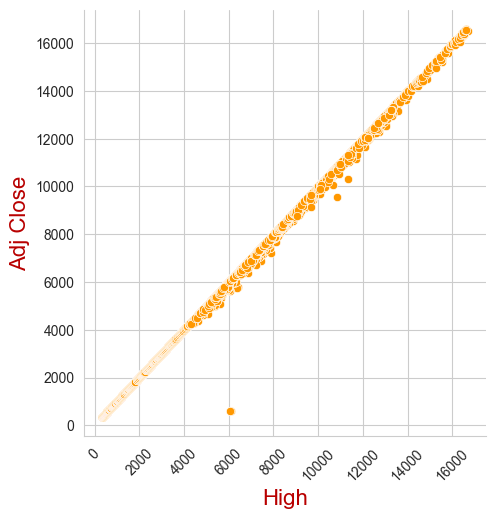

<Figure size 640x480 with 0 Axes>

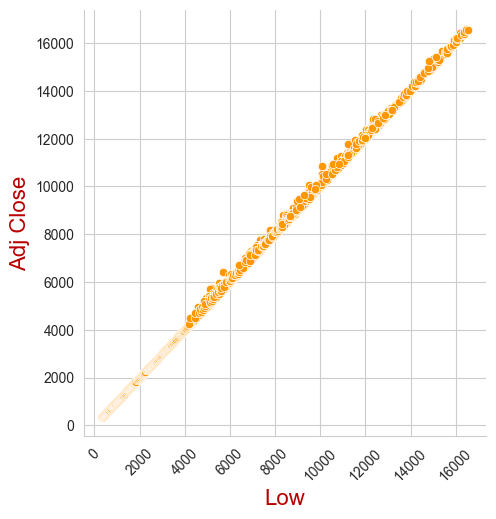

<Figure size 640x480 with 0 Axes>

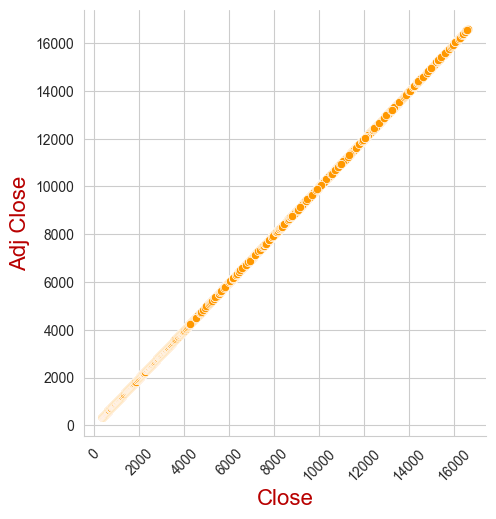

In [17]:
data_viz(data, 'High', 'Adj Close')
data_viz(data, 'Low', 'Adj Close')
data_viz(data, 'Close', 'Adj Close')

<h5 style = "color: green">As shown in the graphs, only the scatterplot between "High" and "Adj Close" has noisy data. Therefore, we only need to set up condition for this particular pair of variables</h5>

In [18]:
condition3 = (data['High'] > 6000)  & (data['High'] < 8000) & (data['Adj Close'] > 0) & (data['Adj Close'] < 2000)

In [19]:
noisyData = data[condition3]
data.drop(noisyData.index, inplace = True)

<Figure size 640x480 with 0 Axes>

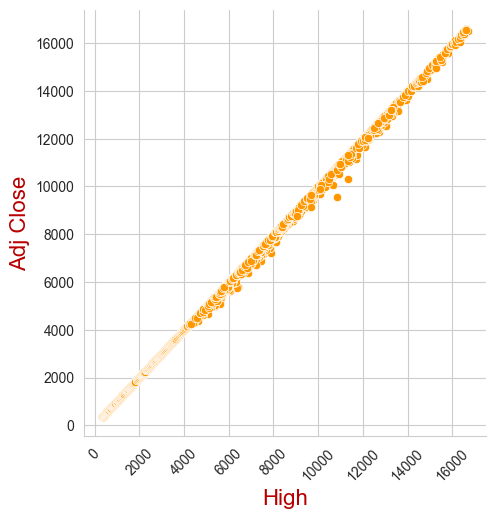

In [20]:
data_viz(data, 'High', 'Adj Close')

<h3 style = 'color: red'>4. Data Visualization:</h3>
- Heatmap: to find relationship between variables
- Lineplot: see price change overtime

<Axes: >

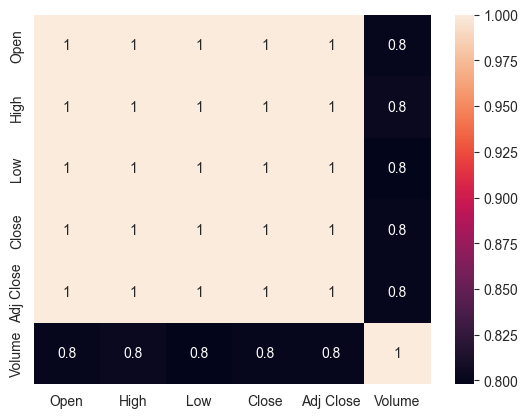

In [21]:
data_heatmap = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
sns.heatmap(data_heatmap.corr(), annot = True)

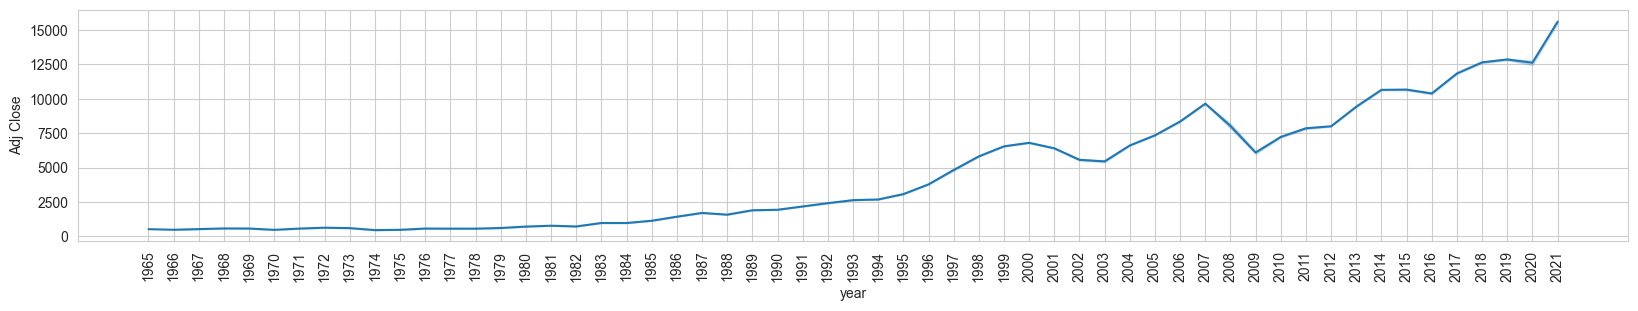

In [22]:
plt.figure(figsize=(20,3))
sns.lineplot(x = 'year', y = 'Adj Close', data = data)
plt.xticks(data['year'].unique(), rotation=90)
plt.show()

In [23]:
fig = go.Figure(data = [go.Candlestick(x=data['year'],
                                       open = data['Open'],
                                       high = data['High'],
                                       low = data['Low'],
                                       close = data['Close'])])
fig.show()

<h3 style = 'color: red'>5. Conclusion:</h3>
<p>- The data has to be cleaned</p>
<p>- We only dealt with data for NYA</p>
<p>- Data has noise which required to be remove through scatterplot</p>
<p>- We have missing values and it is removed</p>
<h5 style = 'color:red'>Finally, throughout the analytical graph, we conclude that with the passage of time,  price of stock has imcrease. Also, the adjust closing price has perfect linear relationship with other variables of the data</h5>